In [1]:
import gymnasium
import minigrid
import numpy as np
from PIL import Image
import os, sys

rocket_dir = os.path.split(os.path.abspath(os.curdir))[:-1]
rocket_src_dir = os.path.join(*rocket_dir, 'src')
rocket_dir = os.path.join(*rocket_dir)

print(f'Appending to sys.path:', [rocket_dir, rocket_src_dir])

sys.path.append(rocket_dir)
sys.path.append(rocket_src_dir)


pygame 2.5.2 (SDL 2.28.2, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Appending to sys.path: ['/mnt/llmdata/home/gbonetta/progetti/rocket', '/mnt/llmdata/home/gbonetta/progetti/rocket/src']


In [ ]:
gymnasium.pprint_registry()

In [ ]:
minigrid.__version__

In [2]:
from src.environments.minigrid_env import make_minigrid_env
runs_directory = 'runs_directory_prova'
envs = gymnasium.vector.SyncVectorEnv(
            [make_minigrid_env(
                runs_directory,
                'MiniGrid-DoorKey-8x8-v0', #'MiniGrid-Fetch-8x8-N3-v0',#'MiniGrid-DoorKey-5x5-v0', #'MiniGrid-LockedRoom-v0','MiniGrid-LavaGapS7-v0', 'MiniGrid-PutNear-8x8-N3-v0', #'MiniGrid-PutNear-8x8-N3-v0','MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS11N5-v0', 'MiniGrid-DoorKey-8x8-v0' 'MiniGrid-SimpleCrossingS11N5-v0' 'MiniGrid-LavaCrossingS9N3-v0' 'MiniGrid-SimpleCrossingS11N5-v0'
                possible_actions_list=['forward','opt_left','opt_right','opt_back'],
                fov=1,
                fixed_orientation=False,
                no_step_description=False,
                seed=1 + i *100,
                save_video=False,
                save_video_every=100,
                save_stats=False
            )
            for i in range(2)
            ])

/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment FrozenLakeText-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment Hanoi3Disk-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: U

In [3]:
observation, info = envs.reset(seed=123, options={})
#print(f"{observation['image'].shape=}, {info=}")
#print(f"{observation['mission']=}, {info=}")
print(info['obs'][1])

/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/minigrid/wrappers.py:62: UserWarning: WARN: A seed has been passed to `ReseedWrapper.reset` which is ignored.
  logger.warn(
/mnt/llmdata/home/gbonetta/miniconda3/miniconda/envs/crafter_env/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


Your mission is:

use the key to open the door and then get to the goal.

You see:
- a locked yellow door 5 steps behind you.
- a yellow key 2 steps behind you.
- a grey wall 1 step to your left.
- the goal 5 steps ahead of you.



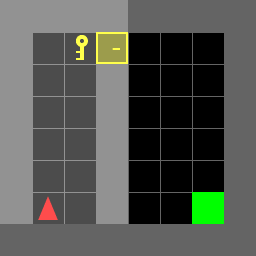

In [4]:
image = envs.envs[0].render()
image = Image.fromarray(image.astype(np.uint8))
display(image)

In [ ]:

print(envs.envs[0].get_wrapper_attr('step_count'))

In [13]:
list(envs.envs[0].action_to_option_seq_filtered.items())

[(0, [2]), (1, [0, 2]), (2, [1, 2]), (3, [0, 0, 2])]

In [22]:
import random
done = False
for step in range(1):
    #action = envs.single_action_space.sample()  # agent policy that uses the observation and info
    #action = random.sample(list(range(len(envs.envs[0].action_enum))), 1)[0]
    action = 5

    observation, reward, terminated, truncated, info = envs.step([action, action])

    done = np.logical_or(terminated,truncated).any()
    print(f"\n\nSTEP: {step}: we did {action=}, and resulted in {observation.shape=}, {reward=}, {done=}, {info=}")
    image = envs.envs[0].render()
    image = Image.fromarray(image.astype(np.uint8))
    display(image)

#envs.close()

KeyError: 5